In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print("shape of train data",x_train.shape)

shape of train data (60000, 28, 28)


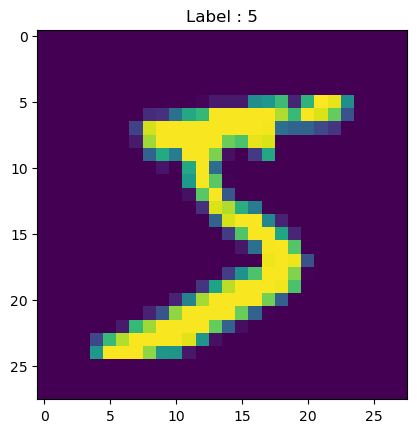

In [5]:
plt.imshow(x_train[0])
plt.title(f"Label : {y_train[0]}")
plt.show()

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [11]:
print("X_train shape : ",x_train.shape)

# convert ot 1d shape

x_train = x_train.reshape(-1,28*28)
x_test  = x_test.reshape(-1,28*28)

print("After change of X_train : ",x_train.shape)

X_train shape :  (60000, 28, 28)
After change of X_train :  (60000, 784)


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)), # input layer
    tf.keras.layers.Dense(128,activation='relu'), # hidden layer
    tf.keras.layers.Dense(10,activation='softmax') #output layer 
])



# Forward Proipagtion

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print("Model Compiled Successfully...")

Model Compiled Successfully...


In [20]:
model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1440 - accuracy: 0.7179 - val_loss: 38.7896 - val_accuracy: 0.7839
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4744 - accuracy: 0.8761 - val_loss: 47.4319 - val_accuracy: 0.8049
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3764 - accuracy: 0.8965 - val_loss: 50.4361 - val_accuracy: 0.8130
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3370 - accuracy: 0.9050 - val_loss: 47.1758 - val_accuracy: 0.8336
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3147 - accuracy: 0.9102 - val_loss: 48.1840 - val_accuracy: 0.8370


In [22]:
test_loss ,test_accuracy = model.evaluate(x_test,y_test,verbose=0)

print("Accuracy of our model is : ",test_accuracy)

Accuracy of our model is :  0.8370000123977661


In [23]:
pred = model.predict(x_test[:5])

pred

1/1 [==============================] - 0s 123ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Show the predicted class for the first test image
print(f"Predicted label for the first test image: {predictions[0].argmax()}")


313/313 [==============================] - 0s 832us/step
Predicted label for the first test image: 7


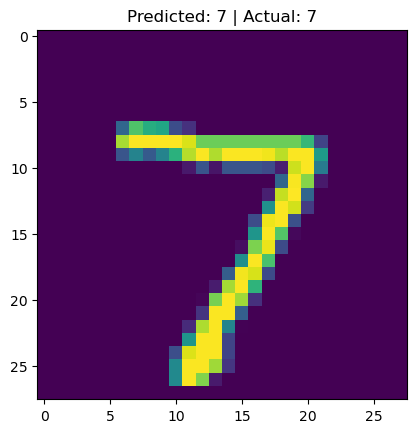

In [26]:
import matplotlib.pyplot as plt

# Plot the first test image
plt.imshow(x_test[0].reshape(28, 28))
plt.title(f"Predicted: {predictions[0].argmax()} | Actual: {y_test[0]}")
plt.show()


#  CNN

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [22]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [23]:
x_train = x_train / 255.0
x_test  = x_test / 255.0

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [24]:
x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

x_train.shape

(60000, 28, 28, 1)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),  # extract 32 features
    tf.keras.layers.MaxPooling2D((2,2)), # reduc esi eby half
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

print("Model build successfully")

Model build successfully


In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1587 - accuracy: 0.9524 - val_loss: 0.0588 - val_accuracy: 0.9806
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0552 - accuracy: 0.9836 - val_loss: 0.0471 - val_accuracy: 0.9847
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0501 - val_accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0433 - val_accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0468 - val_accuracy: 0.9861


In [29]:
test_loss,test_accuracy = model.evaluate(x_test,y_test,verbose=0)

In [30]:
print("accuracy of model is : ",test_accuracy)

accuracy of model is :  0.9861000180244446


In [36]:
pred = model.predict(x_test)

print("Prediction of x_test[0] is ",pred[0].argmax())

313/313 [==============================] - 2s 6ms/step
Prediction of x_test[0] is  7


In [35]:
y_test[0]

2

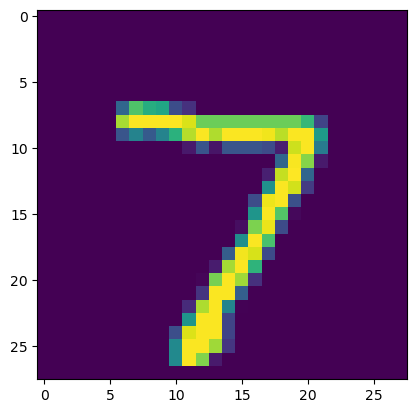

In [39]:
plt.imshow(x_test[0].reshape(28,28))
plt.show()